In [4]:
df_ng = pd.read_csv('ng.csv', index_col='Date', parse_dates=True)
df_ng

,Close
Date,
2006-04-06,595.200012
2006-04-07,588.400024
2006-04-10,597.599976
2006-04-11,595.200012
2006-04-12,597.500000
...,...
2022-01-18,1812.300049
2022-01-19,1843.099976
2022-01-20,1842.500000


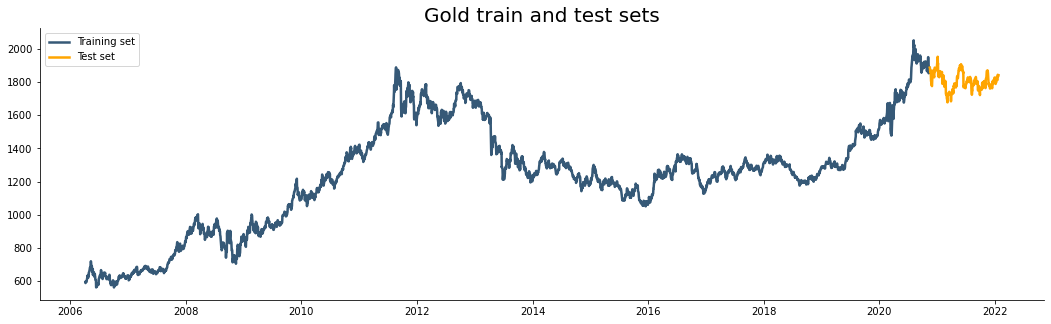

In [5]:
test_size = 405


df_ng_train = df_ng[:-test_size]
df_ng_test = df_ng[-test_size:]

plt.title('Natural Gas train and test sets', size=20)
plt.plot(df_ng_train, label='Training set')
plt.plot(df_ng_test, label='Test set', color='orange')
plt.legend();

In [6]:
df_ng_train

,Close
Date,
2006-04-06,595.200012
2006-04-07,588.400024
2006-04-10,597.599976
2006-04-11,595.200012
2006-04-12,597.500000
...,...
2020-11-09,1853.199951
2020-11-10,1875.400024
2020-11-11,1860.699951


In [7]:
df_ng_test

,Close
Date,
2020-11-16,1887.300049
2020-11-17,1884.500000
2020-11-18,1873.500000
2020-11-19,1861.099976
2020-11-20,1872.599976
...,...
2022-01-18,1812.300049
2022-01-19,1843.099976
2022-01-20,1842.500000


In [8]:
df_ng_test.reset_index(inplace=True)
df_ng_train.reset_index(inplace=True)

In [9]:
df_ng_test

,Date,Close
0,2020-11-16,1887.300049
1,2020-11-17,1884.500000
2,2020-11-18,1873.500000
3,2020-11-19,1861.099976
4,2020-11-20,1872.599976
...,...,...
295,2022-01-18,1812.300049
296,2022-01-19,1843.099976
297,2022-01-20,1842.500000
298,2022-01-21,1831.800049


In [10]:
df_ng_train

,Date,Close
0,2006-04-06,595.200012
1,2006-04-07,588.400024
2,2006-04-10,597.599976
3,2006-04-11,595.200012
4,2006-04-12,597.500000
...,...,...
3671,2020-11-09,1853.199951
3672,2020-11-10,1875.400024
3673,2020-11-11,1860.699951
3674,2020-11-12,1872.599976


In [11]:
# Rename the columns [Date,Close] to [ds, y]

ts_ng = df_ng_train

ts_ng = df_ng_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_ng_test = df_ng_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_ng.tail(5)

,ds,y
3671,2020-11-09,1853.199951
3672,2020-11-10,1875.400024
3673,2020-11-11,1860.699951
3674,2020-11-12,1872.599976
3675,2020-11-13,1885.699951


In [12]:
x_ng_test = ts_ng_test[['ds']]

In [13]:
ts_ng_test

,ds,y
0,2020-11-16,1887.300049
1,2020-11-17,1884.500000
2,2020-11-18,1873.500000
3,2020-11-19,1861.099976
4,2020-11-20,1872.599976
...,...,...
295,2022-01-18,1812.300049
296,2022-01-19,1843.099976
297,2022-01-20,1842.500000
298,2022-01-21,1831.800049


In [14]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model_ng = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday)


In [15]:
# Fit the timeseries into Model
Model_ng.fit(ts_ng)

In [16]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_ng_dates = Model_ng.make_future_dataframe(periods=1518, freq='D')
future_ng_dates.tail()

,ds
5189,2025-01-05
5190,2025-01-06
5191,2025-01-07
5192,2025-01-08
5193,2025-01-09


In [17]:
future_ng_dates= future_ng_dates.loc[future_ng_dates['ds'] >= '2020-11-16']

In [18]:
x_ng_test = pd.DataFrame(x_ng_test)

In [19]:
x_ng_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [20]:
# Predict the values for future dates and take the head of forecast

predicitons_ng = Model_ng.predict(x_ng_test)

In [ ]:
x_ng_test

In [21]:
forecast_ng = Model_ng.predict(future_ng_dates)

In [22]:
future_ng_dates.head(15)

,ds
3678,2020-11-16
3679,2020-11-17
3680,2020-11-18
3681,2020-11-19
3682,2020-11-20
3683,2020-11-21
3684,2020-11-22
3685,2020-11-23
3686,2020-11-24
3687,2020-11-25


In [23]:
forecast_ng.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1511,2025-01-05,2628.153776,692.405342,4504.555561,670.326819,4497.155127,0.0,0.0,0.0,-11.866847,...,-1.005988,-1.005988,-1.005988,-18.908765,-18.908765,-18.908765,0.0,0.0,0.0,2616.286929
1512,2025-01-06,2628.723988,678.978919,4506.467634,668.633143,4499.371877,0.0,0.0,0.0,-8.843071,...,0.106558,0.106558,0.106558,-16.997535,-16.997535,-16.997535,0.0,0.0,0.0,2619.880918
1513,2025-01-07,2629.294201,619.450171,4525.516761,666.939467,4501.588626,0.0,0.0,0.0,-6.751783,...,0.308679,0.308679,0.308679,-15.108368,-15.108368,-15.108368,0.0,0.0,0.0,2622.542418
1514,2025-01-08,2629.864414,671.328937,4490.952687,665.245791,4503.805376,0.0,0.0,0.0,-4.399194,...,0.818247,0.818247,0.818247,-13.265347,-13.265347,-13.265347,0.0,0.0,0.0,2625.465220
1515,2025-01-09,2630.434627,676.012897,4508.932971,663.732744,4505.390397,0.0,0.0,0.0,-2.945882,...,0.497029,0.497029,0.497029,-11.490817,-11.490817,-11.490817,0.0,0.0,0.0,2627.488745


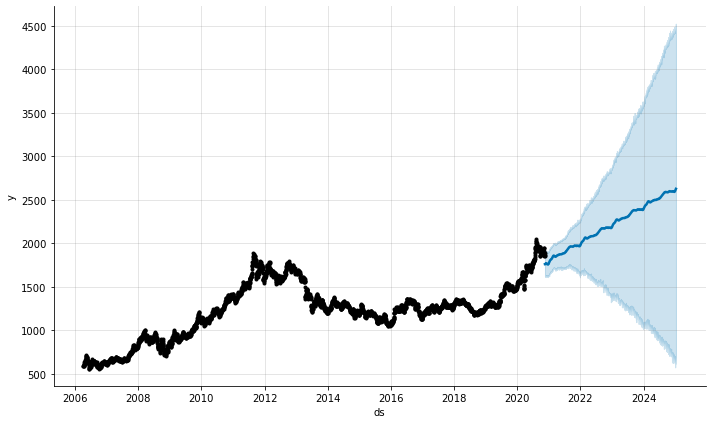

In [24]:
Model_ng.plot(forecast_sivler, uncertainty=True)
plt.show()

In [25]:
df_ng_test = pd.concat([df_ng_test,predicitons_ng], axis=1)
df_ng_test

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,1887.300049,2020-11-16,1766.562402,1625.788964,1901.441025,1766.562402,1766.562402,0.0,0.0,...,0.106558,0.106558,0.106558,-12.547180,-12.547180,-12.547180,0.0,0.0,0.0,1762.169687
1,2020-11-17,1884.500000,2020-11-17,1767.132615,1620.388429,1911.538458,1767.132615,1767.132615,0.0,0.0,...,0.308679,0.308679,0.308679,-13.055621,-13.055621,-13.055621,0.0,0.0,0.0,1762.433578
2,2020-11-18,1873.500000,2020-11-18,1767.702827,1623.364422,1902.199914,1767.702827,1767.702827,0.0,0.0,...,0.818247,0.818247,0.818247,-13.494212,-13.494212,-13.494212,0.0,0.0,0.0,1763.074769
3,2020-11-19,1861.099976,2020-11-19,1768.273040,1610.780677,1904.005215,1768.273040,1768.273040,0.0,0.0,...,0.497029,0.497029,0.497029,-13.867364,-13.867364,-13.867364,0.0,0.0,0.0,1762.950612
4,2020-11-20,1872.599976,2020-11-20,1768.843253,1623.941199,1889.954434,1768.843253,1768.843253,0.0,0.0,...,0.281464,0.281464,0.281464,-14.181615,-14.181615,-14.181615,0.0,0.0,0.0,1762.991007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,1812.300049,2022-01-18,2010.613433,1644.705424,2358.949017,1651.330089,2353.833554,0.0,0.0,...,0.308679,0.308679,0.308679,-1.036649,-1.036649,-1.036649,0.0,0.0,0.0,2017.933369
296,2022-01-19,1843.099976,2022-01-19,2011.183646,1656.560680,2365.284321,1650.879833,2355.296545,0.0,0.0,...,0.818247,0.818247,0.818247,-0.490511,-0.490511,-0.490511,0.0,0.0,0.0,2019.559288
297,2022-01-20,1842.500000,2022-01-20,2011.753859,1645.483665,2387.217475,1650.429577,2356.747770,0.0,0.0,...,0.497029,0.497029,0.497029,-0.053941,-0.053941,-0.053941,0.0,0.0,0.0,2020.244853
298,2022-01-21,1831.800049,2022-01-21,2012.324071,1659.972523,2355.704866,1649.979321,2359.622657,0.0,0.0,...,0.281464,0.281464,0.281464,0.288921,0.288921,0.288921,0.0,0.0,0.0,2020.942362


In [26]:
predicitons_ng

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,1766.562402,1625.788964,1901.441025,1766.562402,1766.562402,0.0,0.0,0.0,-4.392715,...,0.106558,0.106558,0.106558,-12.547180,-12.547180,-12.547180,0.0,0.0,0.0,1762.169687
1,2020-11-17,1767.132615,1620.388429,1911.538458,1767.132615,1767.132615,0.0,0.0,0.0,-4.699037,...,0.308679,0.308679,0.308679,-13.055621,-13.055621,-13.055621,0.0,0.0,0.0,1762.433578
2,2020-11-18,1767.702827,1623.364422,1902.199914,1767.702827,1767.702827,0.0,0.0,0.0,-4.628058,...,0.818247,0.818247,0.818247,-13.494212,-13.494212,-13.494212,0.0,0.0,0.0,1763.074769
3,2020-11-19,1768.273040,1610.780677,1904.005215,1768.273040,1768.273040,0.0,0.0,0.0,-5.322428,...,0.497029,0.497029,0.497029,-13.867364,-13.867364,-13.867364,0.0,0.0,0.0,1762.950612
4,2020-11-20,1768.843253,1623.941199,1889.954434,1768.843253,1768.843253,0.0,0.0,0.0,-5.852245,...,0.281464,0.281464,0.281464,-14.181615,-14.181615,-14.181615,0.0,0.0,0.0,1762.991007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,2010.613433,1644.705424,2358.949017,1651.330089,2353.833554,0.0,0.0,0.0,7.319935,...,0.308679,0.308679,0.308679,-1.036649,-1.036649,-1.036649,0.0,0.0,0.0,2017.933369
296,2022-01-19,2011.183646,1656.560680,2365.284321,1650.879833,2355.296545,0.0,0.0,0.0,8.375642,...,0.818247,0.818247,0.818247,-0.490511,-0.490511,-0.490511,0.0,0.0,0.0,2019.559288
297,2022-01-20,2011.753859,1645.483665,2387.217475,1650.429577,2356.747770,0.0,0.0,0.0,8.490995,...,0.497029,0.497029,0.497029,-0.053941,-0.053941,-0.053941,0.0,0.0,0.0,2020.244853
298,2022-01-21,2012.324071,1659.972523,2355.704866,1649.979321,2359.622657,0.0,0.0,0.0,8.618291,...,0.281464,0.281464,0.281464,0.288921,0.288921,0.288921,0.0,0.0,0.0,2020.942362


In [27]:
df_ng_test.yhat.value_counts()

1947.653701    1
1836.320246    1
1975.216002    1
1763.843892    1
1791.847698    1
              ..
1972.704173    1
1875.076429    1
1966.101232    1
1972.169978    1
1972.370299    1
Name: yhat, Length: 300, dtype: int64

In [28]:
mean_squared_error(df_ng_test.Close,df_ng_test.yhat,squared=False)

134.8386884701176

## Plotting Forecast vs Actuals

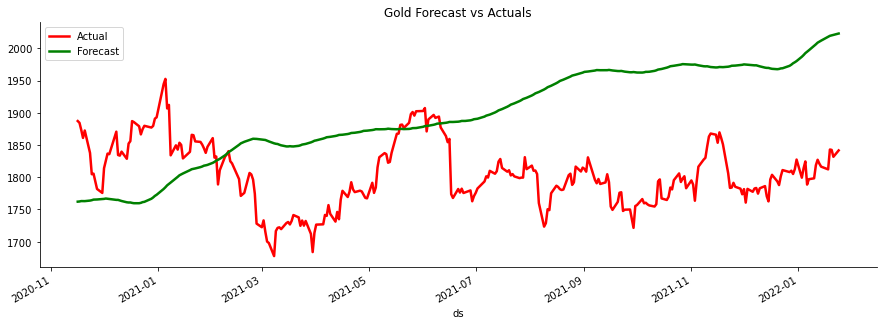

In [29]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_ng_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_ng.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Natural Gas Forecast vs Actuals')
plt.show()

In [30]:
x_ng_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


### MAPE

In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
mape = mean_absolute_percentage_error(ts_ng_test['y'],predicitons_ng['yhat'])
print("MAPE",round(mape,4))

MAPE 6.7113


# Tunning

In [33]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],     
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 18


In [38]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =proph(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
    
    train_model.fit(ts_ng)
    train_forecast = x_ng_test
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = ts_ng_test
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.95299516960539
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.268997583131642
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 8.020792563702148
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.297535691836996
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.913080076114018
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


In [4]:
df_ng = pd.read_csv('ng.csv', index_col='Date', parse_dates=True)
df_ng

,Close
Date,
2006-04-06,595.200012
2006-04-07,588.400024
2006-04-10,597.599976
2006-04-11,595.200012
2006-04-12,597.500000
...,...
2022-01-18,1812.300049
2022-01-19,1843.099976
2022-01-20,1842.500000


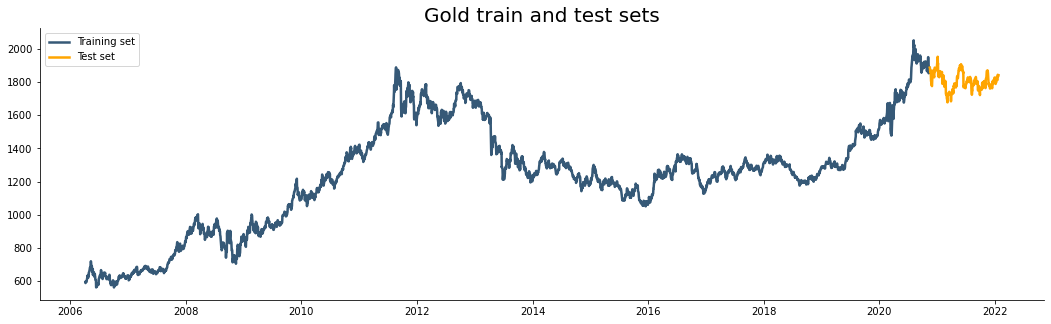

In [5]:
test_size = 405


df_ng_train = df_ng[:-test_size]
df_ng_test = df_ng[-test_size:]

plt.title('Natural Gas train and test sets', size=20)
plt.plot(df_ng_train, label='Training set')
plt.plot(df_ng_test, label='Test set', color='orange')
plt.legend();

In [6]:
df_ng_train

,Close
Date,
2006-04-06,595.200012
2006-04-07,588.400024
2006-04-10,597.599976
2006-04-11,595.200012
2006-04-12,597.500000
...,...
2020-11-09,1853.199951
2020-11-10,1875.400024
2020-11-11,1860.699951


In [7]:
df_ng_test

,Close
Date,
2020-11-16,1887.300049
2020-11-17,1884.500000
2020-11-18,1873.500000
2020-11-19,1861.099976
2020-11-20,1872.599976
...,...
2022-01-18,1812.300049
2022-01-19,1843.099976
2022-01-20,1842.500000


In [8]:
df_ng_test.reset_index(inplace=True)
df_ng_train.reset_index(inplace=True)

In [9]:
df_ng_test

,Date,Close
0,2020-11-16,1887.300049
1,2020-11-17,1884.500000
2,2020-11-18,1873.500000
3,2020-11-19,1861.099976
4,2020-11-20,1872.599976
...,...,...
295,2022-01-18,1812.300049
296,2022-01-19,1843.099976
297,2022-01-20,1842.500000
298,2022-01-21,1831.800049


In [10]:
df_ng_train

,Date,Close
0,2006-04-06,595.200012
1,2006-04-07,588.400024
2,2006-04-10,597.599976
3,2006-04-11,595.200012
4,2006-04-12,597.500000
...,...,...
3671,2020-11-09,1853.199951
3672,2020-11-10,1875.400024
3673,2020-11-11,1860.699951
3674,2020-11-12,1872.599976


In [11]:
# Rename the columns [Date,Close] to [ds, y]

ts_ng = df_ng_train

ts_ng = df_ng_train.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_ng_test = df_ng_test.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts_ng.tail(5)

,ds,y
3671,2020-11-09,1853.199951
3672,2020-11-10,1875.400024
3673,2020-11-11,1860.699951
3674,2020-11-12,1872.599976
3675,2020-11-13,1885.699951


In [12]:
x_ng_test = ts_ng_test[['ds']]

In [13]:
ts_ng_test

,ds,y
0,2020-11-16,1887.300049
1,2020-11-17,1884.500000
2,2020-11-18,1873.500000
3,2020-11-19,1861.099976
4,2020-11-20,1872.599976
...,...,...
295,2022-01-18,1812.300049
296,2022-01-19,1843.099976
297,2022-01-20,1842.500000
298,2022-01-21,1831.800049


In [14]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model_ng = proph(interval_width=0.95,daily_seasonality=True,holidays=holiday)


In [15]:
# Fit the timeseries into Model
Model_ng.fit(ts_ng)

In [16]:
# Use make_future_dataframe with a daily frequency and periods = 1518 for 6 years
future_ng_dates = Model_ng.make_future_dataframe(periods=1518, freq='D')
future_ng_dates.tail()

,ds
5189,2025-01-05
5190,2025-01-06
5191,2025-01-07
5192,2025-01-08
5193,2025-01-09


In [17]:
future_ng_dates= future_ng_dates.loc[future_ng_dates['ds'] >= '2020-11-16']

In [18]:
x_ng_test = pd.DataFrame(x_ng_test)

In [19]:
x_ng_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


In [20]:
# Predict the values for future dates and take the head of forecast

predicitons_ng = Model_ng.predict(x_ng_test)

In [ ]:
x_ng_test

In [21]:
forecast_ng = Model_ng.predict(future_ng_dates)

In [22]:
future_ng_dates.head(15)

,ds
3678,2020-11-16
3679,2020-11-17
3680,2020-11-18
3681,2020-11-19
3682,2020-11-20
3683,2020-11-21
3684,2020-11-22
3685,2020-11-23
3686,2020-11-24
3687,2020-11-25


In [23]:
forecast_ng.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1511,2025-01-05,2628.153776,692.405342,4504.555561,670.326819,4497.155127,0.0,0.0,0.0,-11.866847,...,-1.005988,-1.005988,-1.005988,-18.908765,-18.908765,-18.908765,0.0,0.0,0.0,2616.286929
1512,2025-01-06,2628.723988,678.978919,4506.467634,668.633143,4499.371877,0.0,0.0,0.0,-8.843071,...,0.106558,0.106558,0.106558,-16.997535,-16.997535,-16.997535,0.0,0.0,0.0,2619.880918
1513,2025-01-07,2629.294201,619.450171,4525.516761,666.939467,4501.588626,0.0,0.0,0.0,-6.751783,...,0.308679,0.308679,0.308679,-15.108368,-15.108368,-15.108368,0.0,0.0,0.0,2622.542418
1514,2025-01-08,2629.864414,671.328937,4490.952687,665.245791,4503.805376,0.0,0.0,0.0,-4.399194,...,0.818247,0.818247,0.818247,-13.265347,-13.265347,-13.265347,0.0,0.0,0.0,2625.465220
1515,2025-01-09,2630.434627,676.012897,4508.932971,663.732744,4505.390397,0.0,0.0,0.0,-2.945882,...,0.497029,0.497029,0.497029,-11.490817,-11.490817,-11.490817,0.0,0.0,0.0,2627.488745


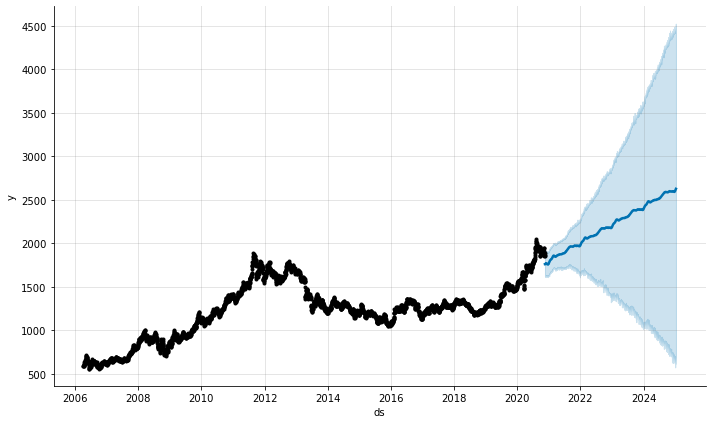

In [24]:
Model_ng.plot(forecast_ng, uncertainty=True)
plt.show()

In [25]:
df_ng_test = pd.concat([df_ng_test,predicitons_ng], axis=1)
df_ng_test

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,1887.300049,2020-11-16,1766.562402,1625.788964,1901.441025,1766.562402,1766.562402,0.0,0.0,...,0.106558,0.106558,0.106558,-12.547180,-12.547180,-12.547180,0.0,0.0,0.0,1762.169687
1,2020-11-17,1884.500000,2020-11-17,1767.132615,1620.388429,1911.538458,1767.132615,1767.132615,0.0,0.0,...,0.308679,0.308679,0.308679,-13.055621,-13.055621,-13.055621,0.0,0.0,0.0,1762.433578
2,2020-11-18,1873.500000,2020-11-18,1767.702827,1623.364422,1902.199914,1767.702827,1767.702827,0.0,0.0,...,0.818247,0.818247,0.818247,-13.494212,-13.494212,-13.494212,0.0,0.0,0.0,1763.074769
3,2020-11-19,1861.099976,2020-11-19,1768.273040,1610.780677,1904.005215,1768.273040,1768.273040,0.0,0.0,...,0.497029,0.497029,0.497029,-13.867364,-13.867364,-13.867364,0.0,0.0,0.0,1762.950612
4,2020-11-20,1872.599976,2020-11-20,1768.843253,1623.941199,1889.954434,1768.843253,1768.843253,0.0,0.0,...,0.281464,0.281464,0.281464,-14.181615,-14.181615,-14.181615,0.0,0.0,0.0,1762.991007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,1812.300049,2022-01-18,2010.613433,1644.705424,2358.949017,1651.330089,2353.833554,0.0,0.0,...,0.308679,0.308679,0.308679,-1.036649,-1.036649,-1.036649,0.0,0.0,0.0,2017.933369
296,2022-01-19,1843.099976,2022-01-19,2011.183646,1656.560680,2365.284321,1650.879833,2355.296545,0.0,0.0,...,0.818247,0.818247,0.818247,-0.490511,-0.490511,-0.490511,0.0,0.0,0.0,2019.559288
297,2022-01-20,1842.500000,2022-01-20,2011.753859,1645.483665,2387.217475,1650.429577,2356.747770,0.0,0.0,...,0.497029,0.497029,0.497029,-0.053941,-0.053941,-0.053941,0.0,0.0,0.0,2020.244853
298,2022-01-21,1831.800049,2022-01-21,2012.324071,1659.972523,2355.704866,1649.979321,2359.622657,0.0,0.0,...,0.281464,0.281464,0.281464,0.288921,0.288921,0.288921,0.0,0.0,0.0,2020.942362


In [26]:
predicitons_ng

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-16,1766.562402,1625.788964,1901.441025,1766.562402,1766.562402,0.0,0.0,0.0,-4.392715,...,0.106558,0.106558,0.106558,-12.547180,-12.547180,-12.547180,0.0,0.0,0.0,1762.169687
1,2020-11-17,1767.132615,1620.388429,1911.538458,1767.132615,1767.132615,0.0,0.0,0.0,-4.699037,...,0.308679,0.308679,0.308679,-13.055621,-13.055621,-13.055621,0.0,0.0,0.0,1762.433578
2,2020-11-18,1767.702827,1623.364422,1902.199914,1767.702827,1767.702827,0.0,0.0,0.0,-4.628058,...,0.818247,0.818247,0.818247,-13.494212,-13.494212,-13.494212,0.0,0.0,0.0,1763.074769
3,2020-11-19,1768.273040,1610.780677,1904.005215,1768.273040,1768.273040,0.0,0.0,0.0,-5.322428,...,0.497029,0.497029,0.497029,-13.867364,-13.867364,-13.867364,0.0,0.0,0.0,1762.950612
4,2020-11-20,1768.843253,1623.941199,1889.954434,1768.843253,1768.843253,0.0,0.0,0.0,-5.852245,...,0.281464,0.281464,0.281464,-14.181615,-14.181615,-14.181615,0.0,0.0,0.0,1762.991007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022-01-18,2010.613433,1644.705424,2358.949017,1651.330089,2353.833554,0.0,0.0,0.0,7.319935,...,0.308679,0.308679,0.308679,-1.036649,-1.036649,-1.036649,0.0,0.0,0.0,2017.933369
296,2022-01-19,2011.183646,1656.560680,2365.284321,1650.879833,2355.296545,0.0,0.0,0.0,8.375642,...,0.818247,0.818247,0.818247,-0.490511,-0.490511,-0.490511,0.0,0.0,0.0,2019.559288
297,2022-01-20,2011.753859,1645.483665,2387.217475,1650.429577,2356.747770,0.0,0.0,0.0,8.490995,...,0.497029,0.497029,0.497029,-0.053941,-0.053941,-0.053941,0.0,0.0,0.0,2020.244853
298,2022-01-21,2012.324071,1659.972523,2355.704866,1649.979321,2359.622657,0.0,0.0,0.0,8.618291,...,0.281464,0.281464,0.281464,0.288921,0.288921,0.288921,0.0,0.0,0.0,2020.942362


In [27]:
df_ng_test.yhat.value_counts()

1947.653701    1
1836.320246    1
1975.216002    1
1763.843892    1
1791.847698    1
              ..
1972.704173    1
1875.076429    1
1966.101232    1
1972.169978    1
1972.370299    1
Name: yhat, Length: 300, dtype: int64

In [28]:
mean_squared_error(df_ng_test.Close,df_ng_test.yhat,squared=False)

134.8386884701176

## Plotting Forecast vs Actuals

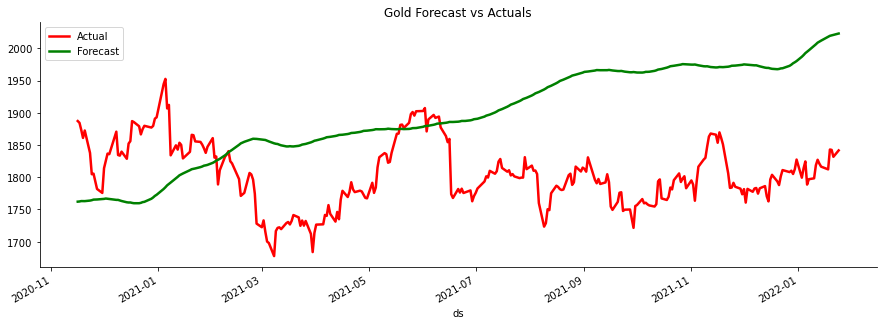

In [29]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts_ng_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predicitons_ng.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Natural Gas Forecast vs Actuals')
plt.show()

In [30]:
x_ng_test

,ds
0,2020-11-16
1,2020-11-17
2,2020-11-18
3,2020-11-19
4,2020-11-20
...,...
295,2022-01-18
296,2022-01-19
297,2022-01-20
298,2022-01-21


### MAPE

In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
mape = mean_absolute_percentage_error(ts_ng_test['y'],predicitons_ng['yhat'])
print("MAPE",round(mape,4))

MAPE 6.7113


# Tunning

In [33]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],     
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 18


In [38]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =proph(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
    
    train_model.fit(ts_ng)
    train_forecast = x_ng_test
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = ts_ng_test
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.95299516960539
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.268997583131642
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 8.020792563702148
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.297535691836996
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 7.913080076114018
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
